In [2]:
import os
import glob

In [3]:
delhi_o3s = glob.glob('O3_tifs/*.tif')

In [7]:
delhi_o3s = [tif for tif in delhi_o3s if len(tif)==28]

In [8]:
delhi_o3s

['O3_tifs\\O3_2019_Apr_CF50.tif',
 'O3_tifs\\O3_2019_Aug_CF50.tif',
 'O3_tifs\\O3_2019_Dec_CF50.tif',
 'O3_tifs\\O3_2019_Feb_CF50.tif',
 'O3_tifs\\O3_2019_Jan_CF50.tif',
 'O3_tifs\\O3_2019_Jul_CF50.tif',
 'O3_tifs\\O3_2019_Jun_CF50.tif',
 'O3_tifs\\O3_2019_Mar_CF50.tif',
 'O3_tifs\\O3_2019_May_CF50.tif',
 'O3_tifs\\O3_2019_Nov_CF50.tif',
 'O3_tifs\\O3_2019_Oct_CF50.tif',
 'O3_tifs\\O3_2019_Sep_CF50.tif',
 'O3_tifs\\O3_2020_Apr_CF50.tif',
 'O3_tifs\\O3_2020_Aug_CF50.tif',
 'O3_tifs\\O3_2020_Dec_CF50.tif',
 'O3_tifs\\O3_2020_Feb_CF50.tif',
 'O3_tifs\\O3_2020_Jan_CF50.tif',
 'O3_tifs\\O3_2020_Jul_CF50.tif',
 'O3_tifs\\O3_2020_Jun_CF50.tif',
 'O3_tifs\\O3_2020_Mar_CF50.tif',
 'O3_tifs\\O3_2020_May_CF50.tif',
 'O3_tifs\\O3_2020_Nov_CF50.tif',
 'O3_tifs\\O3_2020_Oct_CF50.tif',
 'O3_tifs\\O3_2020_Sep_CF50.tif',
 'O3_tifs\\O3_2021_Apr_CF50.tif',
 'O3_tifs\\O3_2021_Aug_CF50.tif',
 'O3_tifs\\O3_2021_Dec_CF50.tif',
 'O3_tifs\\O3_2021_Feb_CF50.tif',
 'O3_tifs\\O3_2021_Jan_CF50.tif',
 'O3_tifs\\O3_

In [9]:
# Convert tiff to aray
import numpy as np
import rasterio

def tiff_to_array_rasterio(file_path):
    # Open the TIFF file
    with rasterio.open(file_path) as src:
        # Read the image data
        img_array = src.read()
        # Optionally, you may want to read metadata
        meta = src.meta
        xmin, ymin, xmax, ymax = src.bounds

    
    return img_array, meta, xmin, ymin, xmax, ymax


In [10]:
num = 8
print(delhi_o3s[num])
o3_array, meta, xmin, ymin, xmax, ymax = tiff_to_array_rasterio(delhi_o3s[num])

O3_tifs\O3_2019_May_CF50.tif


In [11]:
# Convert tif into grids shapefile
import geopandas as gpd
from shapely.geometry import box

idx, rows, cols = o3_array.shape
x_res = (xmax - xmin) / cols
y_res = (ymax - ymin) / rows

# Create polygons from the grid cells
polygons = []
for i in range(rows):
    for j in range(cols):
        x = xmin + j * x_res
        y = ymax - (i + 1) * y_res
        polygons.append({
            'geometry': box(x, y, x + x_res, y - y_res),
            'value': o3_array[0, i, j]  # Assuming the raster has values associated with each cell
        })
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(polygons)

# Assign CRS to the GeoDataFrame
gdf.crs = 'EPSG:4326'

In [12]:
# Define custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'blue'), (0.25, 'green'), (0.45, 'yellow'), (0.7, 'brown'), (1, 'white')]  # Define color points: (position, color)
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

In [13]:
print('{}-{}'.format(o3_array.min(),o3_array.max()))

nan-nan


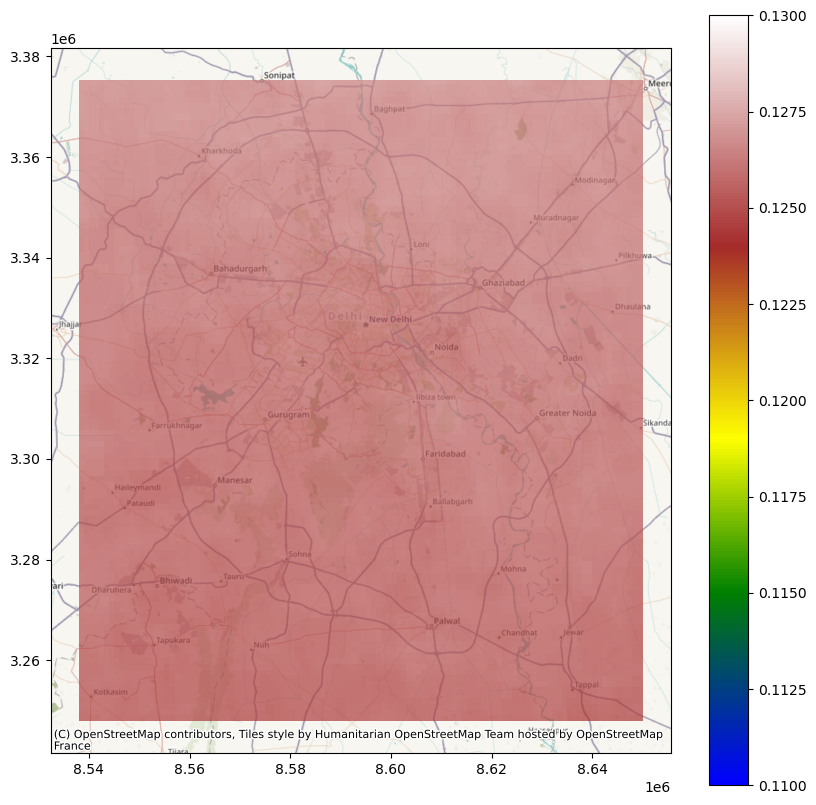

In [14]:
import matplotlib.pyplot as plt
import contextily as cx

## Plot grids_masked for the masked map
gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot(figsize=(10, 10),
              column='value',
              alpha=0.7, #Transparency
              legend=True,
              cmap=custom_cmap,
              vmin=0.11,
              vmax=0.13
             )
cx.add_basemap(ax)

plt.show()